In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
import numpy as np
import os

In [2]:
plt.rc('font', family='Malgun Gothic')

In [3]:
station_list=[]
for i in os.listdir("./station_list"):
    station_list.append(i)

In [4]:
def read_csv_ym(station_name, year, month):
    if year != '2020':
        df1 = pd.read_csv(f'station_list/{station_name}/{year}/{station_name}_{year}_{month}.csv')
    else:
        df1 = pd.read_csv(f'station_list/{station_name}/{year}/{station_name}_2020_1.csv')
    return df1

In [64]:
def make_si_list(df, pm):
    resultArr = np.zeros((25,31))
    if pm == 10:
        # DataFrame.'특성명'.'데이터'.'행렬'.'transpose'
        pm10_Arr = df.pm10.values.reshape(31,24).T
        # 행렬 연산을 통해 위의 24x31행렬을 25x32행렬로 확장해줌
        resultArr[1:,:] = resultArr[1:,:] + pm10_Arr
        return resultArr.tolist()
    elif pm == 2.5:
        pm25_Arr = df.pm25.values.reshape(31,24).T
        resultArr[1:,:] = resultArr[1:,:] + pm25_Arr
        return resultArr.tolist()
    else:
        print('check your pm!!!')

In [65]:
df1 = read_csv_ym('Yongsan_Hangandaero','2019','1')
df2 = read_csv_ym('Yongsan_Hannamdaero','2019','1')

In [76]:
# make_si_list(df1, 10)[1] # 1시
# make_si_list(df1, 10)[2] # 2시
# make_si_list(df1, 10)[3] # 3시

In [80]:
hannamdaero = make_si_list(df2, 10)

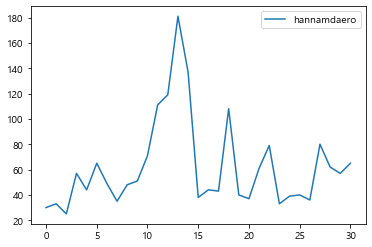

In [81]:
plt.plot(hannamdaero[13],label='hannamdaero')
plt.legend()